# Assignment 3 - Research Track 2

Third assignment for Research Track 2 course, done by **Vinícius Ferreira (S5646764)**.

This notebook refers to the first assignment done on Research Track 1 course, tasked with performing a statistical analysis on the author's implementation and compare with the solution provided from a colleague. The test should give results regarding to which code performs better, when silver and golden tokens are randomly placed in the environment.

Performance evaluators can be, but not only:
* The average time required to finish the task
* The number of success/failures

## Setup
For this assignment, the selected performance evaluator is the average time required to finish the task, with both author and colleague's robots having the same speed and tokens placement for a fair comparison.

### Time implementation

The code for the first assignment on Research Track 1 is slightly modified with the addition of a code snippet to track the time from the code start to the exit condition occurence. For the author's code, `assignment.py`, three lines of code were added:

```python
    ...
    start_timer = time.time() # After the modules
    ...
    end_timer = time.time() # Right before the exit condition
    print("Time taken", end_timer - start_timer) # After the `end_timer` variable and before the `exit()`
```

### Token placement randomizer

The base script for the arena and the tokens placement, `two_colours_assignment_arena.py`, have a few lines changed in order to implement a randomization process for the tokens. The commented lines are the code's original lines, with the randomization done by importing the `random` module.

```python
    ...
    # angle = angle_offset + (2 * pi / TOKENS_PER_CIRCLE) * i
    # token.location = (cos(angle) * radius, sin(angle) * radius)
    angle = random.uniform(0, 2*pi) 
    token_radius = random.uniform(INNER_CIRCLE_RADIUS, OUTER_CIRCLE_RADIUS)
    token.location = (cos(angle) * token_radius, sin(angle) * token_radius)
    ...
```

## Sample data collection

About 15 samples will be collected from each code, with each sample having a different scheme when compared to the previous, but the same between the codes. Plots with histogram and average time spent in each sample are drawn.



In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import random

%matplotlib inline

Data collection

In [10]:
time_author = np.array([241.643229008, 252.904240131, 318.740622044, 348.321344137, 337.6777029, 276.151684999, 362.068265915, 325.601244726, 340.982776403, 290.183756708, 287.432694563, 330.004204221, 319.576957902, 284.932817362, 312.500570527])
time_colleague = np.array([35.04874396324158, 36.65895891189575, 36.13592195510864, 37.136658906936646, 36.87483787536621, 36.55466890335083, 37.000157833099365, 35.4294970035553, 36.6129949092865, 35.066956996917725, 36.41730499267578, 36.131372928619385, 133.7867889404297, 135.48208713531494, 36.82496500015259])

time_author.sort()
time_colleague.sort()

Mean and standard deviation

In [11]:
author_mean = np.mean(time_author)
colleague_mean = np.mean(time_colleague)

author_std = np.std(time_author)
colleague_std = np.std(time_colleague)

## Plots

Bar plot depicting the comparison between the author's and the colleague's codes

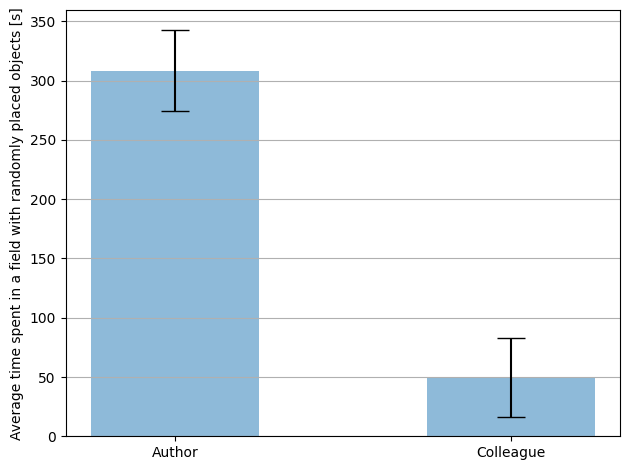

In [12]:
labels = ['Author', 'Colleague']
x_pos_label = np.arange(len(labels))
plot_mean = [author_mean, colleague_mean]
plot_std = [author_std, colleague_std]

plot_bar, ax_plot = plt.subplots()
ax_plot.bar(x_pos_label, plot_mean,
            yerr = plot_std,
            align = 'center',
            alpha = 0.5,
            ecolor = 'black',
            capsize = 10,
            width = 0.5)
ax_plot.set_ylabel('Average time spent in a field with randomly placed objects [s]')
ax_plot.set_xticks(x_pos_label)
ax_plot.set_xticklabels(labels)
ax_plot.yaxis.grid(True)

plt.tight_layout()
plt.show()

## Shapiro-wilk test

The Shapiro-Wilk test is aimed at proving the null hypothesis that the sample belongs to a normal distribution, but without specifying which normal distribution, that is, it does not specify the expected value and variance of the distribution. 

If the p-value is greater than the significance level (usually 0.05), the null hypothesis cannot be rejected and it is concluded that the sample is normally distributed. If the p-value is less than the significance level, the null hypothesis is rejected and it is concluded that the sample is not normally distributed.

For this matter, a significance level of $5\%$ is taken into consideration, in order to determine whether the samples are normally distributed (author/colleague).

In [13]:
sig_level = 0.05
stat_author, p_author = stats.shapiro(time_author)
stat_colleague, p_colleague = stats.shapiro(time_colleague)

if p_author > sig_level:
    print("The data is normally distributed for the author.")
    print("P-value =", p_author, "| Significance level =", sig_level)
else:
    print("The data is not normally distributed for the author.")
    print("P-value =", p_author, "| Significance level =", sig_level)
print("=======================================")
if p_colleague > sig_level:
    print("The data is normally distributed for the colleague.")
    print("P-value =", p_colleague, "| Significance level =", sig_level)
else:
    print("The data is not normally distributed for the colleague.")
    print("P-value =", p_colleague, "| Significance level =", sig_level)

The data is normally distributed for the author.
P-value = 0.6819267868995667 | Significance level = 0.05
The data is not normally distributed for the colleague.
P-value = 1.0445208999954048e-06 | Significance level = 0.05


As the data is normally distributed for both codes, it is possible to plot a histogram with a normal distribution curve.

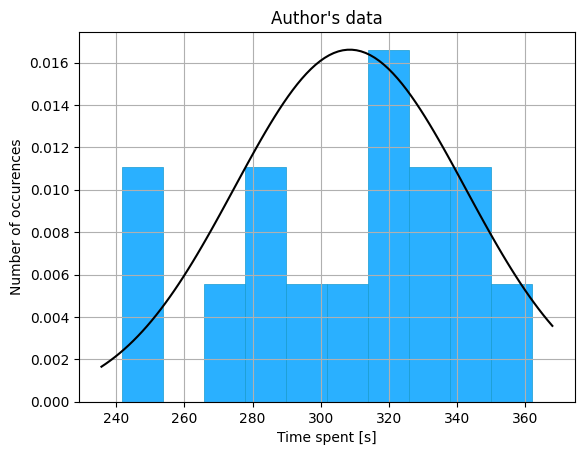

In [14]:
n, bin_num, patches = plt.hist(time_author, bins = 10, density = True, facecolor = '#2ab0ff', edgecolor = '#169acf', linewidth = 0.5)
t_min, t_max = plt.xlim()
t = np.linspace(t_min, t_max, 100)
p = stats.norm.pdf(t, loc=stats.norm.fit(time_author)[0], scale=stats.norm.fit(time_author)[1])

plt.plot(t, np.max(n)*p/np.max(p), 'k', linewidth = 1.5)
plt.ylabel("Number of occurences")
plt.xlabel("Time spent [s]")
plt.grid(True)
plt.title("Author's data")
plt.show()

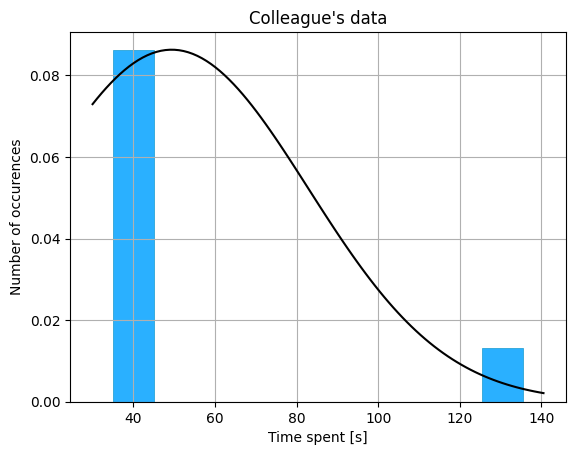

In [15]:
nc, bin_numc, patchesc = plt.hist(time_colleague, bins = 10, density = True, facecolor = '#2ab0ff', edgecolor = '#169acf', linewidth = 0.5)
t_minc, t_maxc = plt.xlim()
tc = np.linspace(t_minc, t_maxc, 100)
pc = stats.norm.pdf(tc, loc=stats.norm.fit(time_colleague)[0], scale=stats.norm.fit(time_colleague)[1])

plt.plot(tc, np.max(nc)*pc/np.max(pc), 'k', linewidth = 1.5)
plt.ylabel("Number of occurences")
plt.xlabel("Time spent [s]")
plt.grid(True)
plt.title("Colleague's data")
plt.show()

## Statistics computation

For the statistics calculation on this assignment, a **T-Test** is done, as the sample size is relatively small, with $N = 15$. A t-test is used to determine if there is a significant difference between the means of two groups. In this case, a comparison of the mean time that takes for the robot simulation to finish the task between two groups is conducted, the author's and the colleague's codes.

### Students t-distribution table for a DoF up to 15

| One-sided |  75%  |  80%  |  85%  |  90%  |  95%  | 97.5% |  99%  | 99.5% | 99.75% | 99.9% | 99.95% |
|:---------:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:------:|:-----:|:------:|
| Two-sided |  50%  |  60%  |  70%  |  80%  |  90%  |  95%  |  98%  |  99%  |  99.5% | 99.8% |  99.9% |
|  1 | 1.000 | 1.376 | 1.963 | 3.078 | 6.314 | 12.706 | 31.821 | 63.657 | 127.321 | 318.309 | 636.619 |
|  2 | 0.816 | 1.061 | 1.386 | 1.886 | 2.920 | 4.303  | 6.965  | 9.925  | 14.089  | 22.327  | 31.599  |
|  3 | 0.765 | 0.978 | 1.250 | 1.638 | 2.353 | 3.182  | 4.541  | 5.841  | 7.453   | 10.215  | 12.924  |
|  4 | 0.741 | 0.941 | 1.190 | 1.533 | 2.132 | 2.776  | 3.747  | 4.604  | 5.598   | 7.173   | 8.610   |
|  5 | 0.727 | 0.920 | 1.156 | 1.476 | 2.015 | 2.571  | 3.365  | 4.032  | 4.773   | 5.893   | 6.869   |
|  6 | 0.718 | 0.906 | 1.134 | 1.440 | 1.943 | 2.447  | 3.143  | 3.707  | 4.317   | 5.208   | 5.959   |
|  7 | 0.711 | 0.896 | 1.119 | 1.415 | 1.895 | 2.365  | 2.998  | 3.499  | 4.029   | 4.785   | 5.408   |
|  8 | 0.706 | 0.889 | 1.108 | 1.397 | 1.860 | 2.306  | 2.896  | 3.355  | 3.833   | 4.501   | 5.041   |
|  9 | 0.703 | 0.883 | 1.100 | 1.383 | 1.833 | 2.262  | 2.821  | 3.250  | 3.690   | 4.297   | 4.781   |
| 10 | 0.700 | 0.879 | 1.093 | 1.372 | 1.812 | 2.228  | 2.764  | 3.169  | 3.581   | 4.144   | 4.587   |
| 11 | 0.697 | 0.876 | 1.088 | 1.363 | 1.796 | 2.201  | 2.718  | 3.106  | 3.497   | 4.025   | 4.437   |
| 12 | 0.695 | 0.873 | 1.083 | 1.356 | 1.782 | 2.179  | 2.681  | 3.055  | 3.428   | 3.930   | 4.318   |
| 13 | 0.694 | 0.870 | 1.079 | 1.350 | 1.771 | 2.160  | 2.650  | 3.012  | 3.372   | 3.852   | 4.221   |
| 14 | 0.692 | 0.868 | 1.076 | 1.345 | 1.761 | 2.145  | 2.624  | 2.977  | 3.326   | 3.787   | 4.140   |
| 15 | 0.691 | 0.866 | 1.074 | 1.341 | 1.753 | 2.131  | 2.602  | 2.947  | 3.286   | 3.733   | 4.073   |

In [16]:
sample_size = len(time_author)
DoF = sample_size - 1
confidence_level = 0.95
table_value_14_095 = 2.145 # two-tailed test
mu = colleague_mean

t_stat, p_val = stats.ttest_1samp(time_author, mu)
t_stat_rel, p_val_rel = stats.ttest_rel(time_author, time_colleague)
t_stat_ind, p_val_ind = stats.ttest_ind(time_author, time_colleague)

print("(Relative)    T-value =", t_stat_rel, "| P-value =", p_val_rel)
print("========================================")
print("(Independent) T-value =", t_stat_ind, "| P-value =", p_val_ind)
print("========================================")
if t_stat_ind > table_value_14_095:
    print("The calculated T-Test is higher than the table value:")
    print(t_stat_ind, ">", table_value_14_095)
    print("Therefore, we reject the null hypothesis H0")
else:
    print("The calculated T-Test is smaller than the table value:")
    print(t_stat_ind, "<", table_value_14_095)
    print("Therefore we reject the alternative hypothesis Ha")


(Relative)    T-value = 30.47643567451669 | P-value = 3.3564838985708596e-14
(Independent) T-value = 20.3473198851065 | P-value = 2.5812896221567794e-18
The calculated T-Test is higher than the table value:
20.3473198851065 > 2.145
Therefore, we reject the null hypothesis H0


At a higher `T-value` than the table, this analysis indicates a strong evidence against the null hypothesys $H_0$, meaning that there is a relatively significant difference between the mean times of the two populations.

With that, it can be concluded that the colleague's code is statistically better performing for the same task when compared to the author's script.